In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
# Get data
df = pd.read_csv("../input/train.csv")

# Look at a sample of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning

In [3]:
# Shape of the data: (observations, features) -> (1456, 81)
df.shape

(1460, 81)

<AxesSubplot:>

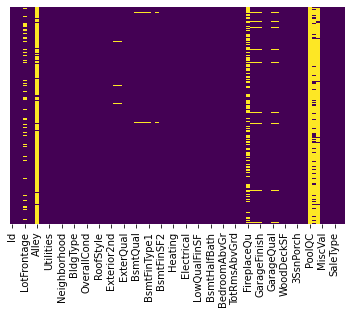

In [4]:
# Get an overview of null values present in the data
# and the feature they belong to
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [5]:
features_with_null = [
    feature for feature in df.columns if df[feature].isnull().sum() >= 1
]
for feature in features_with_null:
    percent_null = np.around(df[feature].isnull().mean(), 4)
    print(f"{feature}: {percent_null*100}% missing")

LotFrontage: 17.740000000000002% missing
Alley: 93.77% missing
MasVnrType: 0.5499999999999999% missing
MasVnrArea: 0.5499999999999999% missing
BsmtQual: 2.53% missing
BsmtCond: 2.53% missing
BsmtExposure: 2.6% missing
BsmtFinType1: 2.53% missing
BsmtFinType2: 2.6% missing
Electrical: 0.06999999999999999% missing
FireplaceQu: 47.260000000000005% missing
GarageType: 5.55% missing
GarageYrBlt: 5.55% missing
GarageFinish: 5.55% missing
GarageQual: 5.55% missing
GarageCond: 5.55% missing
PoolQC: 99.52% missing
Fence: 80.75% missing
MiscFeature: 96.3% missing


In [6]:
numerical_features = [
    feature for feature in df.columns if df[feature].dtype!="O" and feature!="SalePrice"
]

categorical_features = [
    feature for feature in df.columns if df[feature].dtype=="O"
]

x_features = numerical_features+categorical_features

In [7]:
# filling  or dropping columns with null values
# drop: Electrical
# Replace nulls with none: MiscFeature, Fence, GarageCond, GarageQual, GarageFinish, GarageType, FireplaceQu. BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond, BsmtQual, MasVnrType, Alley, PoolQC
# Replace with Zero: MasVnrArea, GarageYrBlt
# Replace based on mean aggregated from categorical column(s):
# LotFrontage -> ,

from sklearn import impute
from sklearn.compose import ColumnTransformer

replace_with_none = ["MiscFeature", "Fence", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "FireplaceQu", "BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond","BsmtQual", "MasVnrType", "Alley", "PoolQC"]
replace_with_0 = ["MasVnrArea", "GarageYrBlt"]

df.loc[:, replace_with_none] = df[replace_with_none].fillna("None")

df.loc[:, replace_with_0] = df[replace_with_0].fillna(0)

imputer = ColumnTransformer([
    ("num_imp", impute.SimpleImputer(strategy="median"), numerical_features),
    ("cat_imp", impute.SimpleImputer(strategy="most_frequent"), categorical_features),
])
imputer.fit(df[x_features])

df[x_features] = imputer.transform(df[x_features])

<AxesSubplot:>

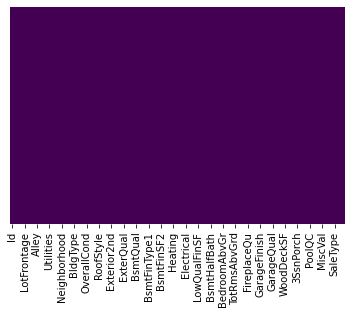

In [8]:
# After handling the missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap="viridis")

In [9]:
features_with_null = [
    feature for feature in df.columns if df[feature].isnull().sum() >= 1
]
for feature in features_with_null:
    percent_null = np.around(df[feature].isnull().mean(), 4)
    print(f"{feature}: {percent_null*100}% missing")

In [10]:
# Shape of the dataframe after the data has been cleaned.
df.shape

(1460, 81)

In [11]:
# Export clean data to file
df.drop(columns=["Id"]).to_csv("../input/clean_train.csv", index=False)

# Exploration

In [12]:
df = pd.read_csv("../input/clean_train.csv")

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000


In [14]:
df.shape # We have 79 features(indepedent) excluding the traget Variable: SalePrice

(1460, 80)

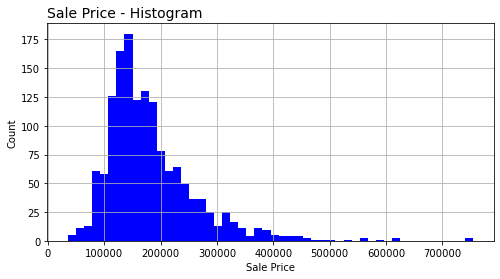

In [15]:
# A histogram to understand the destribution of the traget variable.
df["SalePrice"].hist(bins=50, color="blue", histtype="stepfilled", figsize=(8, 4))
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Sale Price - Histogram", loc="left", fontdict={"size": 14})
plt.show()

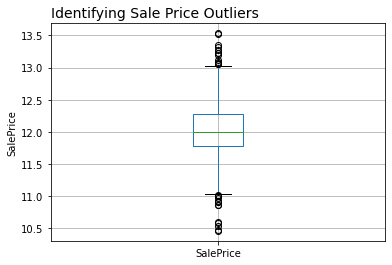

In [16]:
dataset=df.copy()
dataset["SalePrice"]=np.log(dataset["SalePrice"])
dataset.boxplot(column="SalePrice")
plt.ylabel("SalePrice")
plt.title("Identifying Sale Price Outliers", loc="left", fontdict={"size": 14})
plt.show()

In [17]:
numerical_features = [
    feature for feature in df.columns if df[feature].dtype!="O" and feature!="SalePrice"
]
temporal_features = [
    feature for feature in numerical_features if "Yr" in feature or "Year" in feature
]
discrete_features = [
    feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in temporal_features
]
continuous_features = [
    feature for feature in numerical_features if feature not in temporal_features+discrete_features
]

categorical_features = [
    feature for feature in df.columns if df[feature].dtype=="O"
]

In [18]:
print(f"Numerical features: {len(numerical_features)}")
print(f"Temporal features: {len(temporal_features)}")
print(f"Continuous features: {len(continuous_features)}")
print(f"Discrete features: {len(discrete_features)}")

print(f"Categorical features: {len(categorical_features)}") 

Numerical features: 36
Temporal features: 4
Continuous features: 15
Discrete features: 17
Categorical features: 43


In [19]:
df[categorical_features].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1335,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,1267,1198


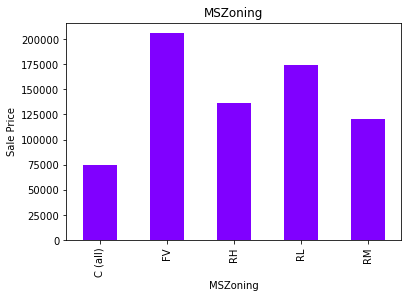

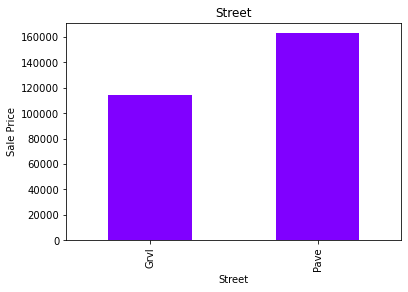

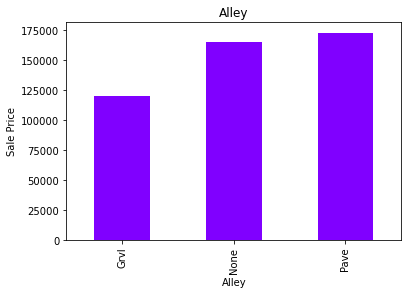

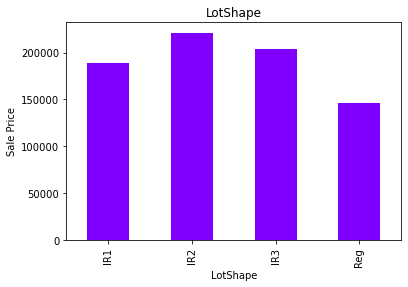

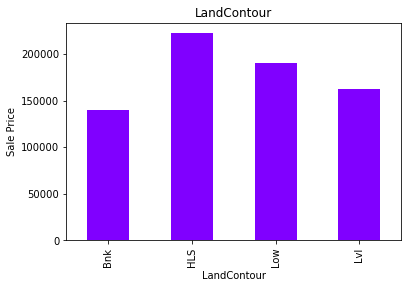

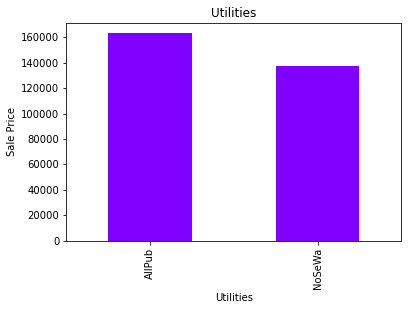

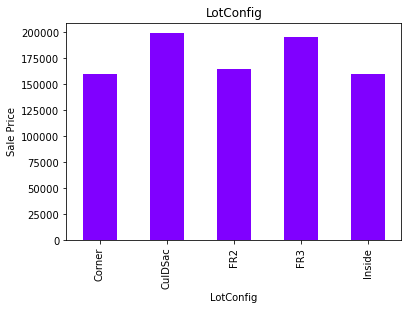

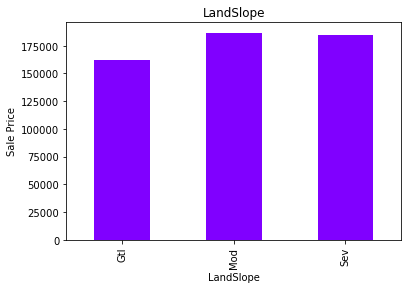

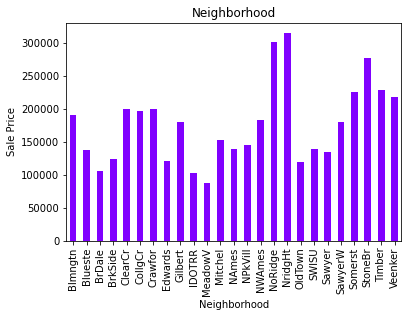

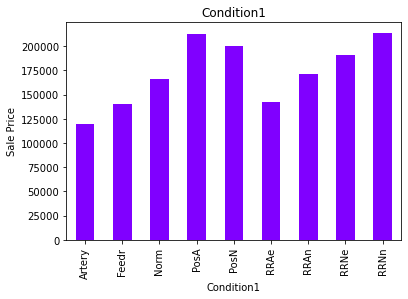

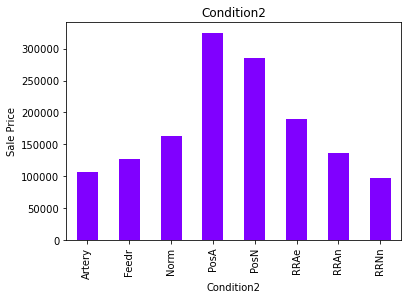

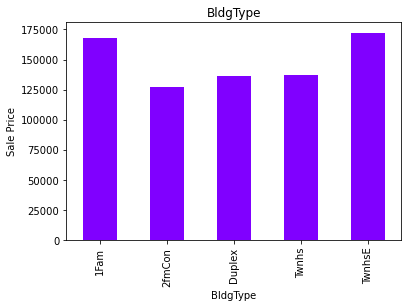

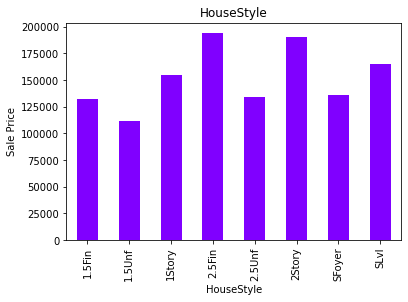

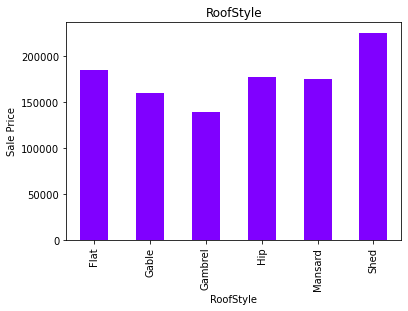

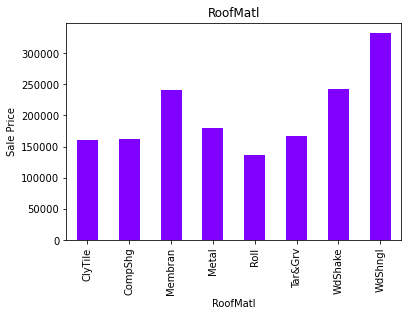

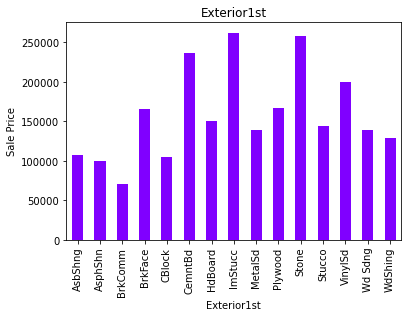

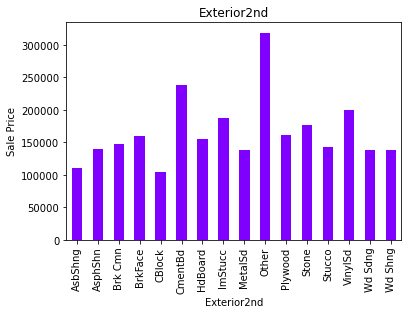

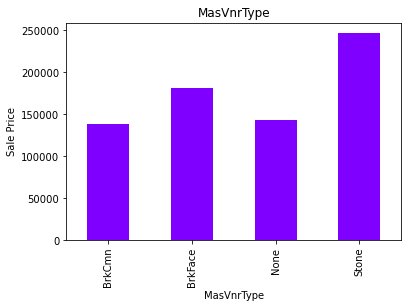

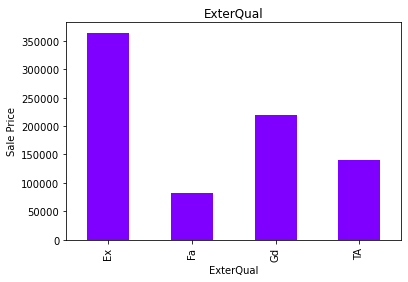

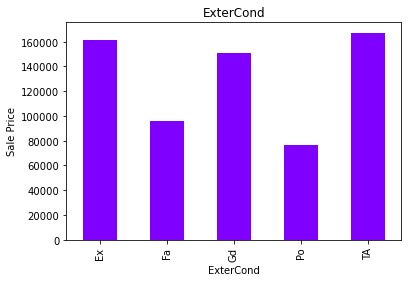

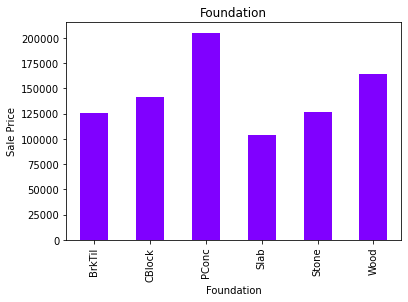

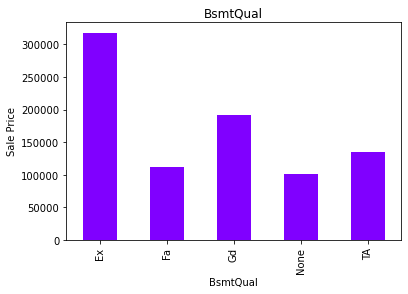

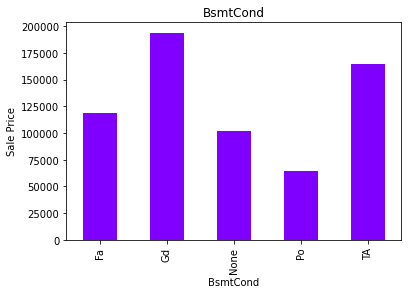

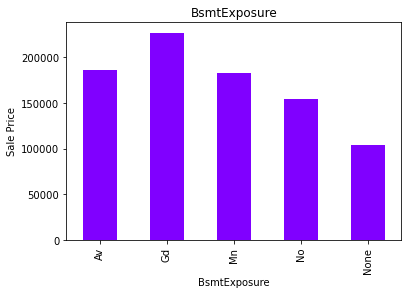

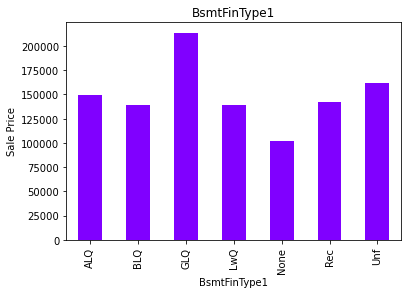

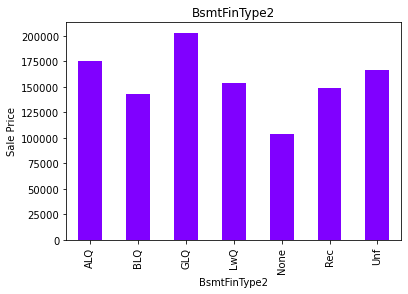

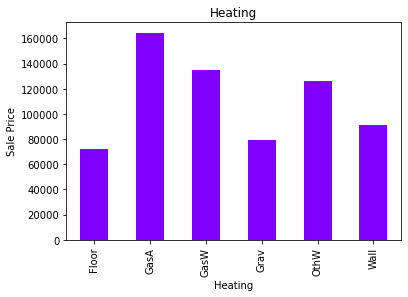

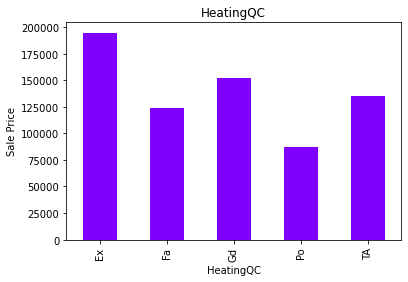

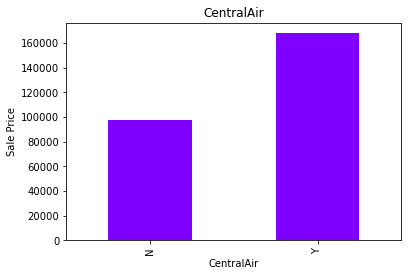

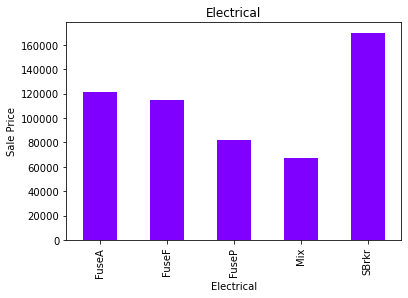

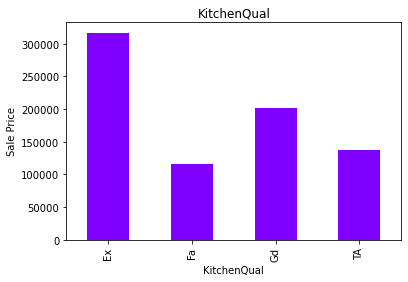

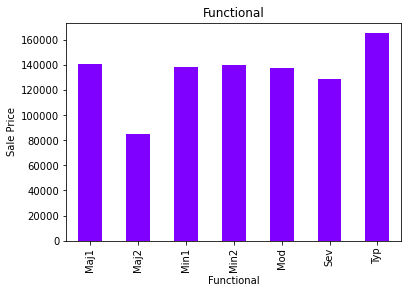

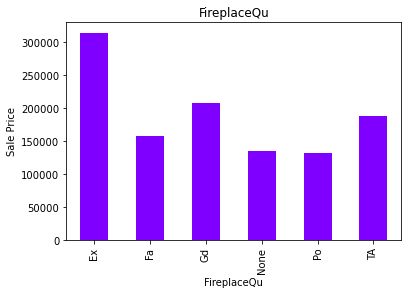

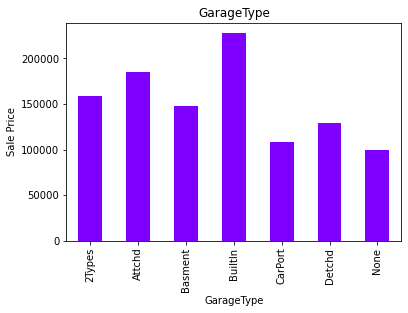

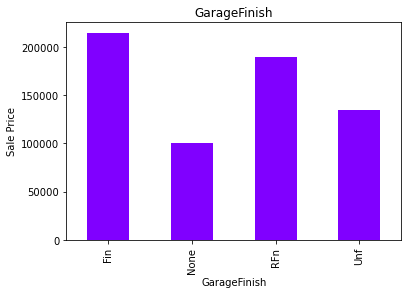

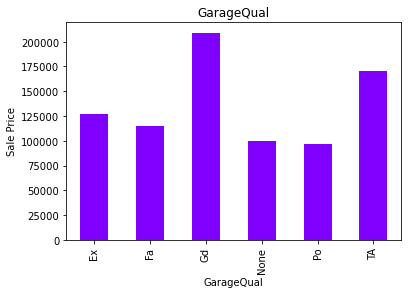

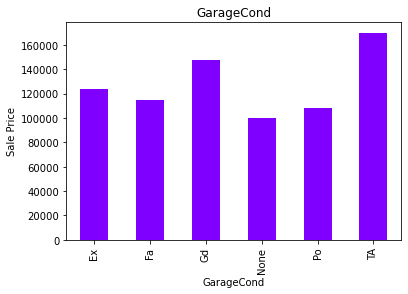

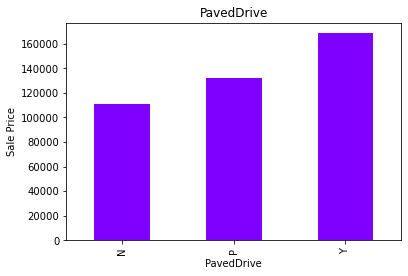

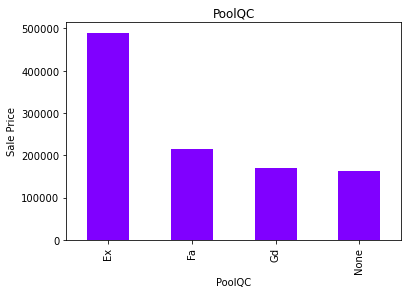

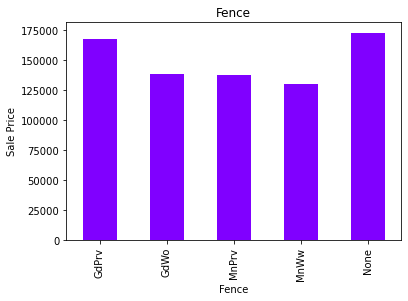

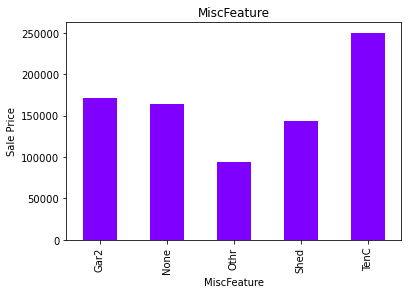

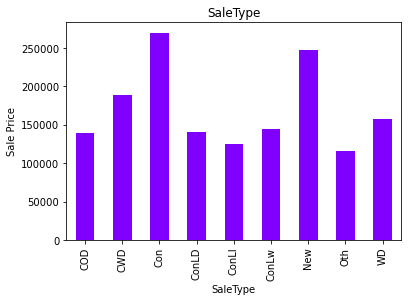

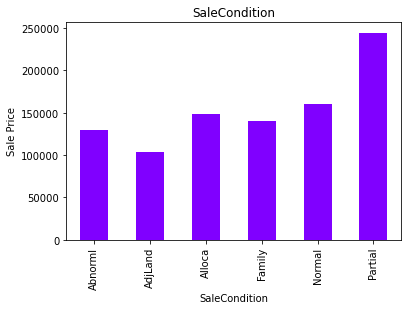

In [20]:
for feature in categorical_features:
    dataset=df.copy()
    dataset.groupby(feature)["SalePrice"].median().plot.bar(cmap="rainbow")
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.title(feature)
    plt.show()

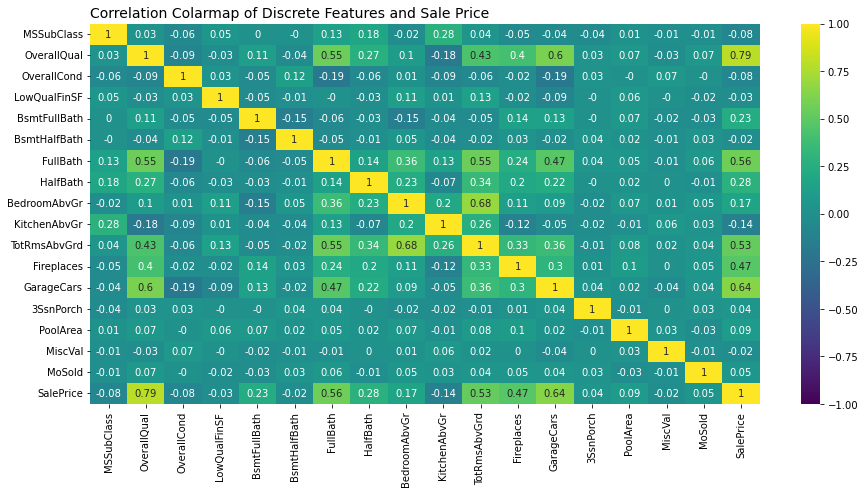

In [21]:
discrete_correlations = (np.around(df[discrete_features+["SalePrice"]].corr(), 2))

plt.figure(figsize=(15, 7))
sns.heatmap(data=discrete_correlations, cmap="viridis", cbar=True, annot=True, linewidths=0, robust=True, vmin=-1, vmax=1)
plt.title("Correlation Colarmap of Discrete Features and Sale Price", loc="left", fontdict={"size": 14})
plt.show()

In [22]:
discrete_correlations["SalePrice"].sort_values(ascending=False)

SalePrice       1.00
OverallQual     0.79
GarageCars      0.64
FullBath        0.56
TotRmsAbvGrd    0.53
Fireplaces      0.47
HalfBath        0.28
BsmtFullBath    0.23
BedroomAbvGr    0.17
PoolArea        0.09
MoSold          0.05
3SsnPorch       0.04
MiscVal        -0.02
BsmtHalfBath   -0.02
LowQualFinSF   -0.03
MSSubClass     -0.08
OverallCond    -0.08
KitchenAbvGr   -0.14
Name: SalePrice, dtype: float64

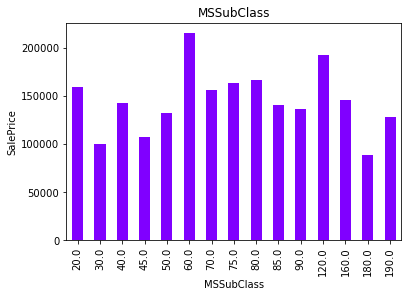

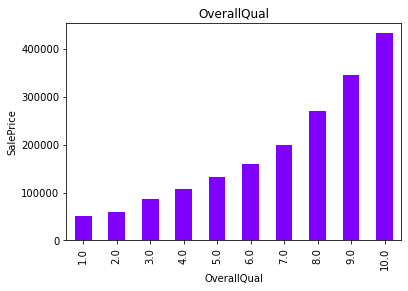

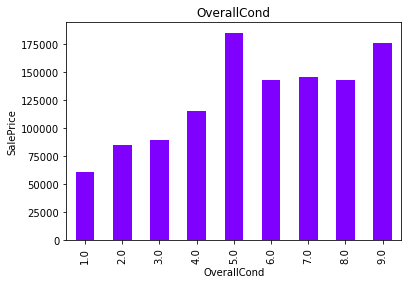

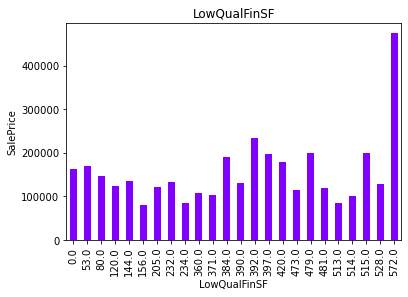

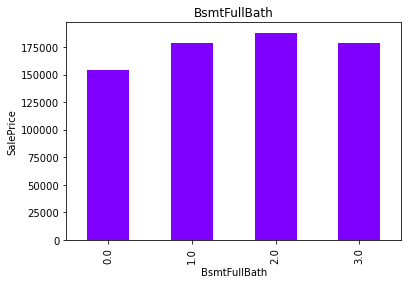

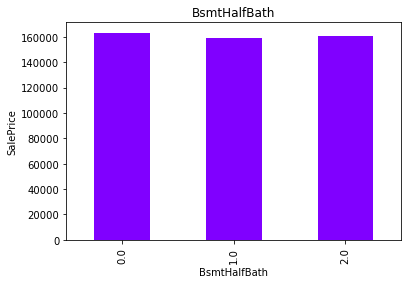

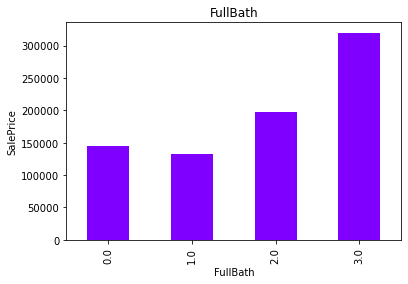

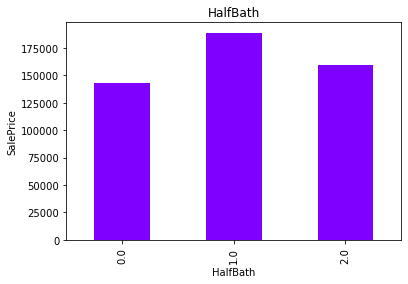

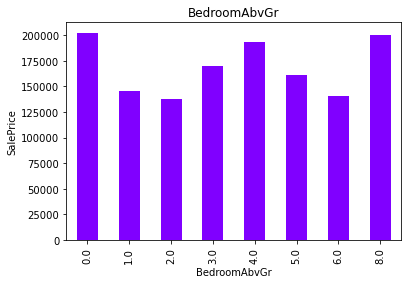

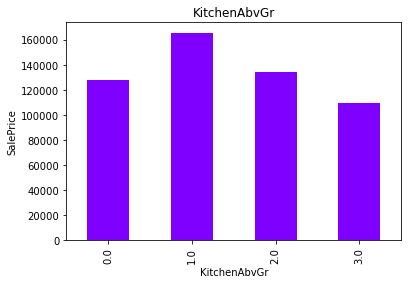

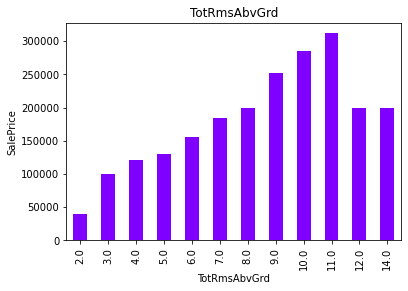

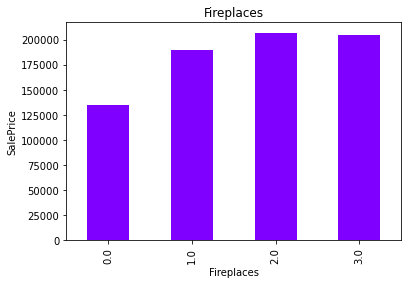

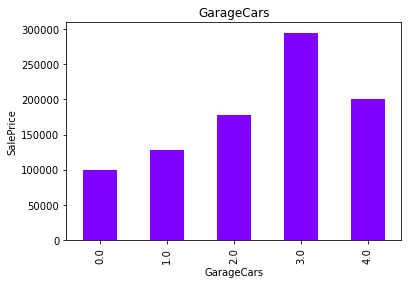

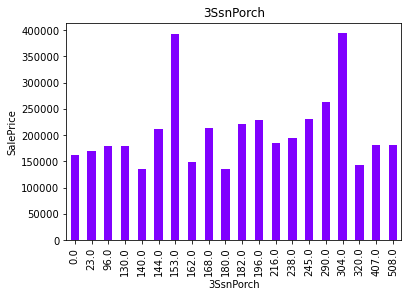

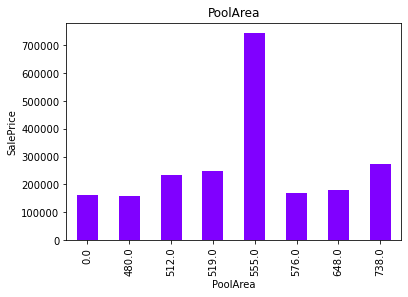

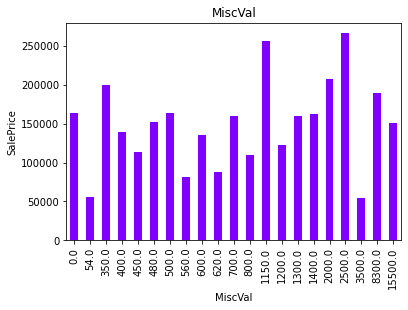

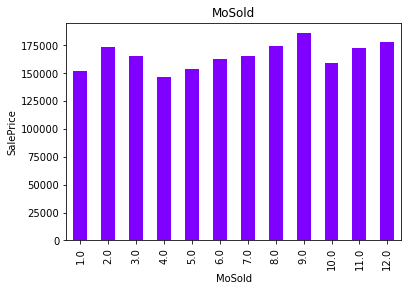

In [23]:
for feature in discrete_features:
    dataset=df.copy()
    dataset.groupby(feature)["SalePrice"].median().plot.bar(cmap="rainbow")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

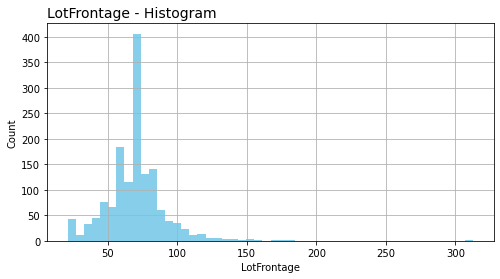

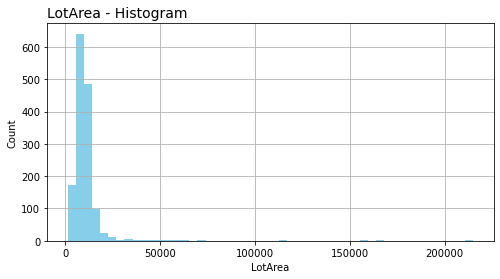

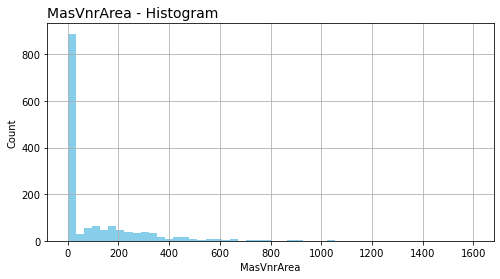

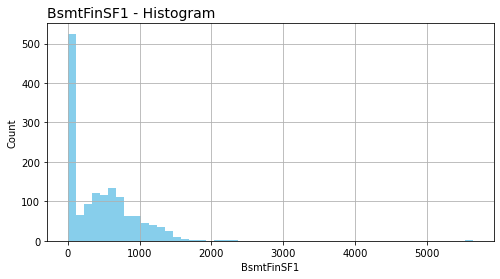

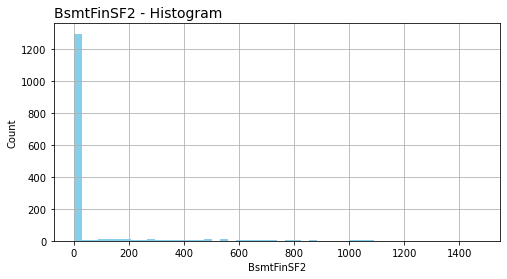

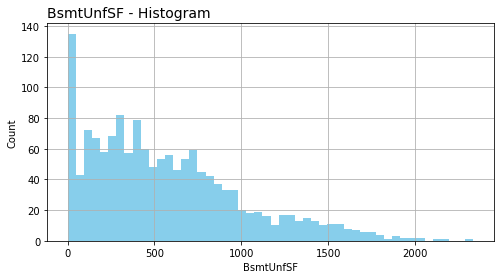

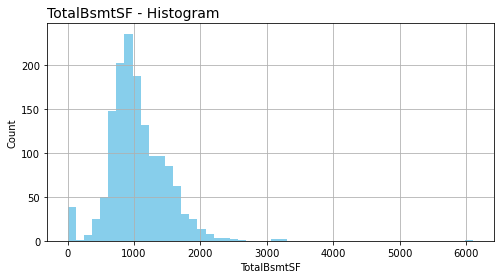

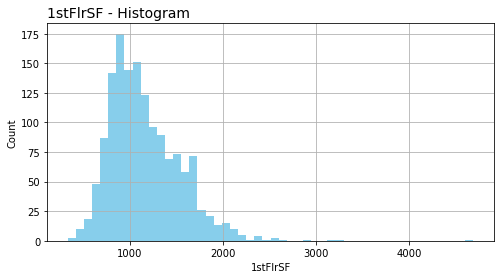

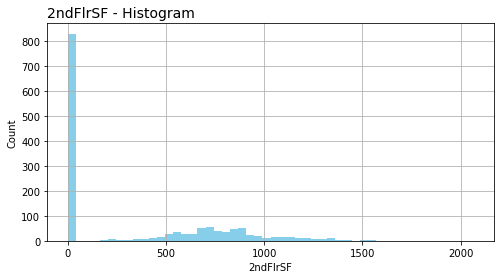

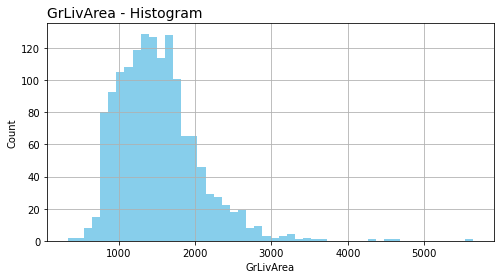

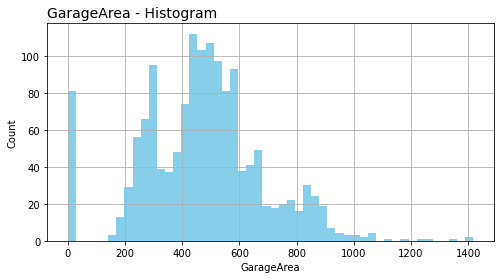

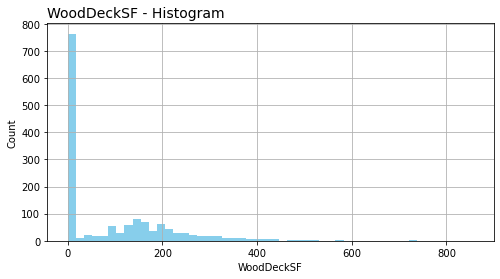

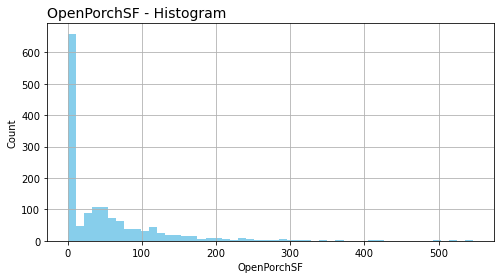

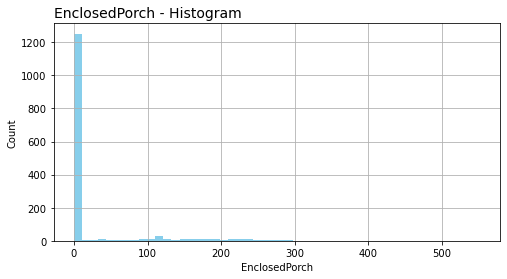

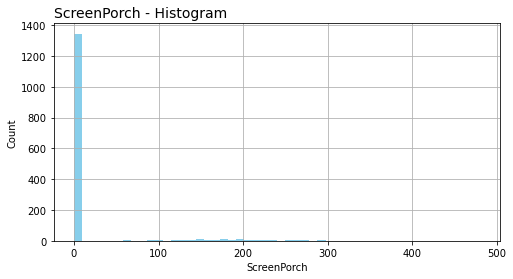

In [24]:
for feature in continuous_features:
    df[feature].hist(bins=50, color="skyblue", histtype="stepfilled", figsize=(8, 4))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"{feature} - Histogram", loc="left", fontdict={"size": 14})
    plt.show()

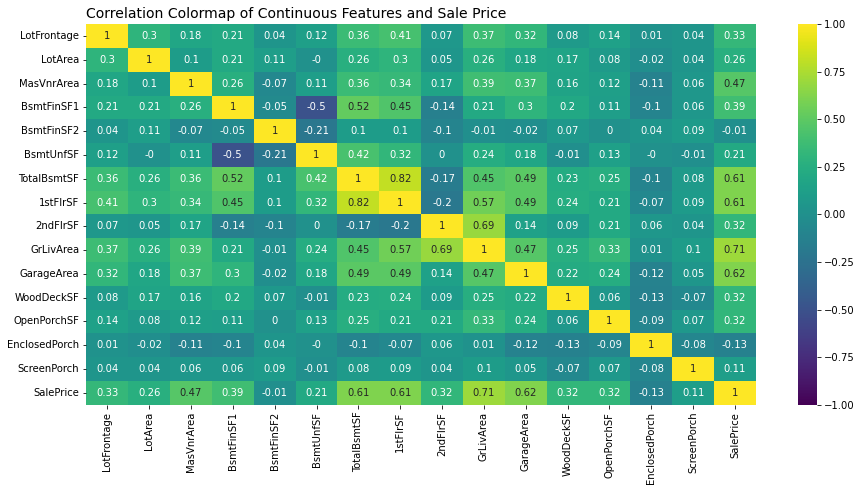

In [25]:
continuous_correlation = (np.around(df[continuous_features+["SalePrice"]].corr(), 2))

plt.figure(figsize=(15, 7))
sns.heatmap(data=continuous_correlation, cmap="viridis", cbar=True, annot=True, linewidths=0, robust=True, vmin=-1, vmax=1)
plt.title("Correlation Colormap of Continuous Features and Sale Price", loc="left", fontdict={"size": 14})
plt.show()

In [26]:
continuous_correlation["SalePrice"].sort_values(ascending=False)

SalePrice        1.00
GrLivArea        0.71
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
MasVnrArea       0.47
BsmtFinSF1       0.39
LotFrontage      0.33
2ndFlrSF         0.32
WoodDeckSF       0.32
OpenPorchSF      0.32
LotArea          0.26
BsmtUnfSF        0.21
ScreenPorch      0.11
BsmtFinSF2      -0.01
EnclosedPorch   -0.13
Name: SalePrice, dtype: float64

The conclusion from the corellation matrix is simple - bigger houses cost more. From the data provided, sale price has a relatively strong postive correlation with the common indicators of house size.

# Preprocesssing

In [27]:
df = pd.read_csv("../input/clean_train.csv")

In [28]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [30]:
df[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003.0,2003.0,2003.0,2008.0
1,1976.0,1976.0,1976.0,2007.0
2,2001.0,2002.0,2001.0,2008.0
3,1915.0,1970.0,1998.0,2006.0
4,2000.0,2000.0,2000.0,2008.0


In [31]:
dataset=df.copy()
dataset["YearRemodAddNew"] = dataset["YrSold"]-dataset["YearRemodAdd"]
dataset["GarageYrBltNew"] = dataset["YrSold"]-dataset["GarageYrBlt"]
dataset["YearBuiltNew"] = dataset["YrSold"]-dataset["YearBuilt"]

(dataset[["YrSold", "YearRemodAddNew", "GarageYrBltNew", "YearBuiltNew"]+["SalePrice"]].corr())["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
YrSold            -0.028923
GarageYrBltNew    -0.261441
YearRemodAddNew   -0.509079
YearBuiltNew      -0.523350
Name: SalePrice, dtype: float64

In [32]:
(dataset[temporal_features+["SalePrice"]].corr())["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.261366
YrSold         -0.028923
Name: SalePrice, dtype: float64

In [33]:
from sklearn import base

# YearBuilt_ix, YearRemodAdd_ix, GarageYrBlt_ix, YrSold_ix = 18, 19, 58, 76

class HandleTemporalFeatures(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, handle_features=True):
        self.handle_features = handle_features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.handle_features==True:
            YearBuiltNew = X.loc[:, "YrSold"] - X.loc[:, "YearBuilt"]
            YearRemodAddNew = X.loc[:, "YrSold"] - X.loc[:, "YearRemodAdd"]
            GarageYrBltNew = X.loc[:, "YrSold"] - X.loc[:, "GarageYrBlt"]
            X = X.drop(columns=["YearBuilt", "YearRemodAdd", "GarageYrBlt"])

            return np.c_[X, YearBuiltNew, YearRemodAddNew, GarageYrBltNew]
        else:
            return np.c_[X]

In [34]:
# Create kfolds for testing choice of preprocessors ans scalers
from sklearn import model_selection

if __name__ == "__main__":
    df["kfold"] = -1
    df = df.sample(frac=1).reset_index(drop=True)
    kf = model_selection.KFold(n_splits=5)
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, "kfold"] = fold
    df.to_csv("../input/ppc_train_folds.csv", index=False)

In [35]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Options for processing categorical features
cat_ohe = Pipeline([
    ("ohe", preprocessing.OneHotEncoder()),
])
cat_lbl = Pipeline([
    ("lbl", preprocessing.OrdinalEncoder()),
])

# Options for processing numerical features
num_htf_mms = Pipeline([
    ("htf", HandleTemporalFeatures(handle_features=True)),
    ("mms", preprocessing.MinMaxScaler()),
])
num_htf_sds = Pipeline([
    ("htf", HandleTemporalFeatures(handle_features=True)),
    ("sds", preprocessing.StandardScaler()),
])

# Processor options
preprocessor_ohe_htf_mms = ColumnTransformer([
    ("num", num_htf_mms, numerical_features),
    ("cat", cat_ohe, categorical_features),
    # ("y", "passthrough", ["SalePrice"])
])

In [36]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics

from sklearn.compose import ColumnTransformer

models_dict = {
    "lin_reg": linear_model.LinearRegression(),
    "lasso": linear_model.Lasso(),
    "dec_tree": tree.DecisionTreeRegressor(),
    "rand_for": ensemble.RandomForestRegressor(),
    "grad_boost": ensemble.GradientBoostingRegressor(),
    "ada_boost": ensemble.AdaBoostRegressor(),
}

def preprocessor_test(model_, num_, cat_):
    for fold_ in range(5):
        df = pd.read_csv("../input/ppc_train_folds.csv")

        df_train = df[df.kfold != fold_].reset_index(drop=True)
        df_valid = df[df.kfold == fold_].reset_index(drop=True)

        # x_train = df_train.drop("SalePrice", axis=1).values
        y_train = df_train.SalePrice.values

        # x_valid = df_valid.drop("SalePrice", axis=1).values
        y_valid = df_valid.SalePrice.values

        preprocessor = ColumnTransformer([
            ("num", num_, numerical_features),
            ("cat", cat_, categorical_features),
        ])
        preprocessor.fit(df)
        x_train = preprocessor.transform(df_train)
        x_valid = preprocessor.transform(df_valid)

        model = models_dict[model_]
        model.fit(x_train, y_train)

        preds = model.predict(x_valid)

        mae = metrics.mean_absolute_error(y_valid, preds)
        r2 = metrics.r2_score(y_valid, preds)
        print(f"Model= {model_}, Fold={fold_}, MAE={mae}, r2_score={r2}")



In [37]:
# Linear Models with mmx & ohe
preprocessor_test("lin_reg", num_htf_mms, cat_ohe)
print(" ")
preprocessor_test("lasso", num_htf_mms, cat_ohe)

Model= lin_reg, Fold=0, MAE=24508.17746214536, r2_score=-0.30414193415934143
Model= lin_reg, Fold=1, MAE=20266.38235651, r2_score=0.8125590684151517
Model= lin_reg, Fold=2, MAE=15883.675825349974, r2_score=0.9056138894016406
Model= lin_reg, Fold=3, MAE=15576.993909666053, r2_score=0.8593212889069558
Model= lin_reg, Fold=4, MAE=19696.536715318933, r2_score=0.8169300989005935
 


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88672360551.90277, tolerance: 749939341.512827
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=0, MAE=19400.122815107778, r2_score=0.7650157707696391


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30198828420.301453, tolerance: 680614323.5497328
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=1, MAE=19884.908802364345, r2_score=0.8132881769305826


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2145151243.8326416, tolerance: 761508407.5119969
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=2, MAE=15570.490485363462, r2_score=0.9173210590914732


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106089655786.78311, tolerance: 788154890.0089741
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=3, MAE=15631.994530788144, r2_score=0.8539558732251326
Model= lasso, Fold=4, MAE=18748.875677972694, r2_score=0.8361632552234437


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36329533017.9946, tolerance: 702204166.1906028
  model = cd_fast.sparse_enet_coordinate_descent(


In [38]:
# Linear Models with mmx & lbl
preprocessor_test("lin_reg", num_htf_mms, cat_lbl)
print(" ")
preprocessor_test("lasso", num_htf_mms, cat_lbl)

Model= lin_reg, Fold=0, MAE=19187.974969136256, r2_score=0.6334383301328805
Model= lin_reg, Fold=1, MAE=23371.11209302871, r2_score=0.7636572471007428
Model= lin_reg, Fold=2, MAE=29469902406697.9, r2_score=-4.661985543864962e+19
Model= lin_reg, Fold=3, MAE=19037.932905813108, r2_score=0.6867982797339929
Model= lin_reg, Fold=4, MAE=20864.610530235503, r2_score=0.8761776179265456
 
Model= lasso, Fold=0, MAE=19178.62466297922, r2_score=0.6324258516373148
Model= lasso, Fold=1, MAE=23350.65169008627, r2_score=0.7640403726796136
Model= lasso, Fold=2, MAE=19559.552637404213, r2_score=0.8675580530521523
Model= lasso, Fold=3, MAE=19030.41968395316, r2_score=0.6896414622054371
Model= lasso, Fold=4, MAE=20876.930290650285, r2_score=0.8760552840282616


In [39]:
# Linear Models with sds & ohe
preprocessor_test("lin_reg", num_htf_sds, cat_ohe)
print(" ")
preprocessor_test("lasso", num_htf_sds, cat_ohe)

Model= lin_reg, Fold=0, MAE=24507.262379093412, r2_score=-0.3040636876477314
Model= lin_reg, Fold=1, MAE=20261.621438062193, r2_score=0.8125796504996947
Model= lin_reg, Fold=2, MAE=15883.824058293256, r2_score=0.905614230327888
Model= lin_reg, Fold=3, MAE=15329.261331142086, r2_score=0.8646653711875212
Model= lin_reg, Fold=4, MAE=19696.476004632, r2_score=0.8169350816327798
 


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222413705300.6067, tolerance: 749939341.512827
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=0, MAE=19343.394493549848, r2_score=0.7937690402170419


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95800957245.50607, tolerance: 680614323.5497328
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=1, MAE=19881.810915209564, r2_score=0.8139891494867253


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94875099112.82437, tolerance: 761508407.5119969
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=2, MAE=15564.624375850259, r2_score=0.9173695213569817


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215352545959.42822, tolerance: 788154890.0089741
  model = cd_fast.sparse_enet_coordinate_descent(


Model= lasso, Fold=3, MAE=15576.988429739198, r2_score=0.8568445030711038
Model= lasso, Fold=4, MAE=18770.76098341909, r2_score=0.8361945567813801


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86105385104.44858, tolerance: 702204166.1906028
  model = cd_fast.sparse_enet_coordinate_descent(


In [40]:
# Linear Models sds & lbl
preprocessor_test("lin_reg", num_htf_sds, cat_lbl)
print(" ")
preprocessor_test("lasso", num_htf_sds, cat_lbl)

Model= lin_reg, Fold=0, MAE=19193.682628755432, r2_score=0.6324774731566472
Model= lin_reg, Fold=1, MAE=23358.386730295024, r2_score=0.7642627895633967
Model= lin_reg, Fold=2, MAE=1524104121.091952, r2_score=-124690040221.46843
Model= lin_reg, Fold=3, MAE=19239.712519351666, r2_score=0.6842180779131528
Model= lin_reg, Fold=4, MAE=21155.422571549836, r2_score=0.8732463119104874
 


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+09, tolerance: 7.499e+08
  model = cd_fast.enet_coordinate_descent(


Model= lasso, Fold=0, MAE=19193.3985374121, r2_score=0.6322596979037542
Model= lasso, Fold=1, MAE=23353.69200379711, r2_score=0.7641268278933278


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.436e+09, tolerance: 7.615e+08
  model = cd_fast.enet_coordinate_descent(


Model= lasso, Fold=2, MAE=19566.529862790358, r2_score=0.8674827056079163
Model= lasso, Fold=3, MAE=19043.104403027464, r2_score=0.6876144680576897
Model= lasso, Fold=4, MAE=20877.168066695824, r2_score=0.8761211744105222


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+09, tolerance: 7.022e+08
  model = cd_fast.enet_coordinate_descent(


In [41]:
# Tree with ohe
preprocessor_test("dec_tree", "passthrough", cat_ohe)

Model= dec_tree, Fold=0, MAE=27416.938356164384, r2_score=0.5183878450778688
Model= dec_tree, Fold=1, MAE=26508.80821917808, r2_score=0.7714125896805064
Model= dec_tree, Fold=2, MAE=25986.818493150684, r2_score=0.7534004854915972
Model= dec_tree, Fold=3, MAE=24518.35616438356, r2_score=0.728941552097224
Model= dec_tree, Fold=4, MAE=29841.465753424658, r2_score=0.7036350476119209


In [42]:
# Tree Model with lbl
preprocessor_test("dec_tree", "passthrough", cat_lbl)

Model= dec_tree, Fold=0, MAE=26755.445205479453, r2_score=0.6128300305788996
Model= dec_tree, Fold=1, MAE=25190.47602739726, r2_score=0.8147884327874982
Model= dec_tree, Fold=2, MAE=25929.02397260274, r2_score=0.7535414455969945
Model= dec_tree, Fold=3, MAE=22950.102739726026, r2_score=0.758335469794251
Model= dec_tree, Fold=4, MAE=27442.455479452055, r2_score=0.76975069884089


In [43]:
# Ensemble Models with ohe
preprocessor_test("rand_for", "passthrough", cat_ohe)
print("")
preprocessor_test("grad_boost", "passthrough", cat_ohe)
print("")
preprocessor_test("ada_boost", "passthrough", cat_ohe)

Model= rand_for, Fold=0, MAE=17970.979006849317, r2_score=0.8133219146693591
Model= rand_for, Fold=1, MAE=19246.867431506846, r2_score=0.8397333563116876
Model= rand_for, Fold=2, MAE=18412.720684931504, r2_score=0.870481930919837
Model= rand_for, Fold=3, MAE=14467.03455479452, r2_score=0.9047529994133015
Model= rand_for, Fold=4, MAE=17357.425034246575, r2_score=0.8956614090456051

Model= grad_boost, Fold=0, MAE=16386.843653031556, r2_score=0.880616013205647
Model= grad_boost, Fold=1, MAE=18105.096177016207, r2_score=0.8386273485111606
Model= grad_boost, Fold=2, MAE=16028.748573208444, r2_score=0.9023028572245351
Model= grad_boost, Fold=3, MAE=13325.478745501163, r2_score=0.92231591890404
Model= grad_boost, Fold=4, MAE=16011.562546351395, r2_score=0.9136943294033221

Model= ada_boost, Fold=0, MAE=24471.52603277041, r2_score=0.7782624999416252
Model= ada_boost, Fold=1, MAE=25591.894988713677, r2_score=0.8081868298256795
Model= ada_boost, Fold=2, MAE=24780.59482527491, r2_score=0.79947419

In [44]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']

# Ensemble Models with ohe
preprocessor_test("rand_for", "passthrough", cat_lbl)
print("")
preprocessor_test("grad_boost", "passthrough", cat_lbl)
print("")
preprocessor_test("ada_boost", "passthrough", cat_lbl)

Model= rand_for, Fold=0, MAE=17504.860000000004, r2_score=0.8315243258272034
Model= rand_for, Fold=1, MAE=18642.969760273972, r2_score=0.8575614916760156
Model= rand_for, Fold=2, MAE=18287.904452054794, r2_score=0.8721203238618103
Model= rand_for, Fold=3, MAE=14444.463595890411, r2_score=0.9018544034848018
Model= rand_for, Fold=4, MAE=17441.129246575343, r2_score=0.8967390369777513

Model= grad_boost, Fold=0, MAE=16248.009237727032, r2_score=0.884785452893439
Model= grad_boost, Fold=1, MAE=18066.647993306357, r2_score=0.8336419588957492
Model= grad_boost, Fold=2, MAE=16162.635251599606, r2_score=0.9003851273036468
Model= grad_boost, Fold=3, MAE=13383.925247944426, r2_score=0.916021188339
Model= grad_boost, Fold=4, MAE=15845.599194450753, r2_score=0.9200000671915769

Model= ada_boost, Fold=0, MAE=24423.851392344804, r2_score=0.7734991102173001
Model= ada_boost, Fold=1, MAE=26314.89590370831, r2_score=0.7883976850077014
Model= ada_boost, Fold=2, MAE=24745.953347458468, r2_score=0.8026070

For the results above, the best models are:
* Linear & Lasso Regression with either Standard/Min-Max Scaling and One-Hot Econding
* Random Forest & Gradient-Boosted regressor with One-Hot/Label Encoding

# Hyper-parameter Optimization

In [45]:
df = pd.read_csv("../input/clean_train.csv")

In [46]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000


In [47]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics

from sklearn.compose import ColumnTransformer

models_dict = {
    "lin_reg": linear_model.LinearRegression(),
    "lasso": linear_model.Lasso(),
    "dec_tree": tree.DecisionTreeRegressor(),
    "rand_for": ensemble.RandomForestRegressor(),
    "grad_boost": ensemble.GradientBoostingRegressor(),
    "ada_boost": ensemble.AdaBoostRegressor(),
}


def hyper_parameter_optimization(model_, num_, cat_, param_grid_):
    df = pd.read_csv("../input/clean_train.csv")

    X = df.drop("SalePrice", axis=1)
    y = df.SalePrice.values

    preprocessor = ColumnTransformer([
        ("num", num_, numerical_features),
        ("cat", cat_, categorical_features),
    ])
    X = preprocessor.fit_transform(X)

    classifier = models_dict[model_]

    model = model_selection.RandomizedSearchCV(
        estimator=classifier,
        param_distributions=param_grid_,
        scoring="neg_mean_absolute_error",
        verbose=10,
        n_jobs=1,
        cv=5,
        n_iter=10
    )

    model.fit(X, y)
    print(f"Best score: {model.best_score_}")

    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid_.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")


In [48]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Linear Regression with mmx
lg_param_grid = {
    "fit_intercept": [True, False],
}
hyper_parameter_optimization("lin_reg", num_htf_mms, cat_ohe, lg_param_grid)

c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START fit_intercept=True..........................................
[CV 1/5; 1/2] END ......fit_intercept=True;, score=-18981.789 total time=   1.3s
[CV 2/5; 1/2] START fit_intercept=True..........................................
[CV 2/5; 1/2] END ......fit_intercept=True;, score=-18956.497 total time=   3.3s
[CV 3/5; 1/2] START fit_intercept=True..........................................
[CV 3/5; 1/2] END ......fit_intercept=True;, score=-19968.233 total time=   2.3s
[CV 4/5; 1/2] START fit_intercept=True..........................................
[CV 4/5; 1/2] END ......fit_intercept=True;, score=-15994.807 total time=   1.9s
[CV 5/5; 1/2] START fit_intercept=True..........................................
[CV 5/5; 1/2] END ......fit_intercept=True;, score=-20096.695 total time=   0.4s
[CV 1/5; 2/2] START fit_intercept=False.........................................
[CV 1/5; 2/2] END .....fit_intercept=False;, scor

In [49]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Linear Regression with sds
lg_param_grid = {
    "fit_intercept": [True, False],
}
hyper_parameter_optimization("lin_reg", num_htf_sds, cat_ohe, lg_param_grid)

c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START fit_intercept=True..........................................
[CV 1/5; 1/2] END ......fit_intercept=True;, score=-18981.833 total time=   0.3s
[CV 2/5; 1/2] START fit_intercept=True..........................................
[CV 2/5; 1/2] END ......fit_intercept=True;, score=-18956.577 total time=   0.3s
[CV 3/5; 1/2] START fit_intercept=True..........................................
[CV 3/5; 1/2] END ......fit_intercept=True;, score=-19968.208 total time=   0.4s
[CV 4/5; 1/2] START fit_intercept=True..........................................
[CV 4/5; 1/2] END ......fit_intercept=True;, score=-15994.908 total time=   0.7s
[CV 5/5; 1/2] START fit_intercept=True..........................................
[CV 5/5; 1/2] END ......fit_intercept=True;, score=-20099.544 total time=   2.8s
[CV 1/5; 2/2] START fit_intercept=False.........................................
[CV 1/5; 2/2] END .....fit_intercept=False;, scor

In [50]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Lasso Regression with mms
lg_param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "fit_intercept": [True, False],
    "max_iter": np.arange(100, 2500, 100)
}
hyper_parameter_optimization("lasso", num_htf_mms, cat_ohe, lg_param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=100, fit_intercept=True, max_iter=300................
[CV 1/5; 1/10] END alpha=100, fit_intercept=True, max_iter=300;, score=-15558.496 total time=   0.1s
[CV 2/5; 1/10] START alpha=100, fit_intercept=True, max_iter=300................
[CV 2/5; 1/10] END alpha=100, fit_intercept=True, max_iter=300;, score=-17776.447 total time=   0.1s
[CV 3/5; 1/10] START alpha=100, fit_intercept=True, max_iter=300................
[CV 3/5; 1/10] END alpha=100, fit_intercept=True, max_iter=300;, score=-17483.903 total time=   0.1s
[CV 4/5; 1/10] START alpha=100, fit_intercept=True, max_iter=300................
[CV 4/5; 1/10] END alpha=100, fit_intercept=True, max_iter=300;, score=-15288.158 total time=   0.1s
[CV 5/5; 1/10] START alpha=100, fit_intercept=True, max_iter=300................
[CV 5/5; 1/10] END alpha=100, fit_intercept=True, max_iter=300;, score=-17981.362 total time=   0.0s
[CV 1/5; 2/10] START alpha=1,

c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226417310160.60526, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 2/10] END alpha=1, fit_intercept=False, max_iter=800;, score=-18203.371 total time=   0.5s
[CV 2/5; 2/10] START alpha=1, fit_intercept=False, max_iter=800.................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198543021859.32388, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 2/10] END alpha=1, fit_intercept=False, max_iter=800;, score=-18587.251 total time=   0.3s
[CV 3/5; 2/10] START alpha=1, fit_intercept=False, max_iter=800.................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185060153521.91925, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 2/10] END alpha=1, fit_intercept=False, max_iter=800;, score=-19129.052 total time=   2.0s
[CV 4/5; 2/10] START alpha=1, fit_intercept=False, max_iter=800.................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214767655699.25232, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 2/10] END alpha=1, fit_intercept=False, max_iter=800;, score=-15847.161 total time=   1.1s
[CV 5/5; 2/10] START alpha=1, fit_intercept=False, max_iter=800.................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221265684652.892, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 2/10] END alpha=1, fit_intercept=False, max_iter=800;, score=-19766.138 total time=   0.3s
[CV 1/5; 3/10] START alpha=10, fit_intercept=True, max_iter=1300................
[CV 1/5; 3/10] END alpha=10, fit_intercept=True, max_iter=1300;, score=-17423.741 total time=   3.5s
[CV 2/5; 3/10] START alpha=10, fit_intercept=True, max_iter=1300................
[CV 2/5; 3/10] END alpha=10, fit_intercept=True, max_iter=1300;, score=-18109.163 total time=   2.4s
[CV 3/5; 3/10] START alpha=10, fit_intercept=True, max_iter=1300................
[CV 3/5; 3/10] END alpha=10, fit_intercept=True, max_iter=1300;, score=-18884.346 total time=   3.3s
[CV 4/5; 3/10] START alpha=10, fit_intercept=True, max_iter=1300................
[CV 4/5; 3/10] END alpha=10, fit_intercept=True, max_iter=1300;, score=-15251.825 total time=   3.4s
[CV 5/5; 3/10] START alpha=10, fit_intercept=True, max_iter=1300................
[CV 5/5; 3/10] END alpha=10, fit_intercept=True, max_iter=1300;, score=-19090.422 total tim

c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135748464597.11157, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 4/10] END alpha=0.1, fit_intercept=True, max_iter=1800;, score=-18286.999 total time=   2.7s
[CV 2/5; 4/10] START alpha=0.1, fit_intercept=True, max_iter=1800...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136200278949.22826, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 4/10] END alpha=0.1, fit_intercept=True, max_iter=1800;, score=-18887.269 total time=   4.6s
[CV 3/5; 4/10] START alpha=0.1, fit_intercept=True, max_iter=1800...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113405600157.40855, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 4/10] END alpha=0.1, fit_intercept=True, max_iter=1800;, score=-19293.963 total time=   4.0s
[CV 4/5; 4/10] START alpha=0.1, fit_intercept=True, max_iter=1800...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200224135749.3482, tolerance: 770619031.1834062
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 4/10] END alpha=0.1, fit_intercept=True, max_iter=1800;, score=-15954.064 total time=   3.8s
[CV 5/5; 4/10] START alpha=0.1, fit_intercept=True, max_iter=1800...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199361666902.08832, tolerance: 724930391.3116124
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 4/10] END alpha=0.1, fit_intercept=True, max_iter=1800;, score=-19950.965 total time=   3.5s
[CV 1/5; 5/10] START alpha=10, fit_intercept=False, max_iter=1000...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149315071650.52957, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 5/10] END alpha=10, fit_intercept=False, max_iter=1000;, score=-17368.512 total time=   0.6s
[CV 2/5; 5/10] START alpha=10, fit_intercept=False, max_iter=1000...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122689850900.44235, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 5/10] END alpha=10, fit_intercept=False, max_iter=1000;, score=-18172.117 total time=   0.6s
[CV 3/5; 5/10] START alpha=10, fit_intercept=False, max_iter=1000...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79906198803.35287, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 5/10] END alpha=10, fit_intercept=False, max_iter=1000;, score=-18786.531 total time=   0.6s
[CV 4/5; 5/10] START alpha=10, fit_intercept=False, max_iter=1000...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73517946064.50806, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 5/10] END alpha=10, fit_intercept=False, max_iter=1000;, score=-15308.983 total time=   0.6s
[CV 5/5; 5/10] START alpha=10, fit_intercept=False, max_iter=1000...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127006899075.15234, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 5/10] END alpha=10, fit_intercept=False, max_iter=1000;, score=-19084.872 total time=   0.6s
[CV 1/5; 6/10] START alpha=0.01, fit_intercept=False, max_iter=300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256737338852.61612, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 6/10] END alpha=0.01, fit_intercept=False, max_iter=300;, score=-19101.486 total time=   0.1s
[CV 2/5; 6/10] START alpha=0.01, fit_intercept=False, max_iter=300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223194273567.952, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 6/10] END alpha=0.01, fit_intercept=False, max_iter=300;, score=-20996.915 total time=   0.2s
[CV 3/5; 6/10] START alpha=0.01, fit_intercept=False, max_iter=300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204140847549.3533, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 6/10] END alpha=0.01, fit_intercept=False, max_iter=300;, score=-21077.527 total time=   0.2s
[CV 4/5; 6/10] START alpha=0.01, fit_intercept=False, max_iter=300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259203970382.0938, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 6/10] END alpha=0.01, fit_intercept=False, max_iter=300;, score=-17219.675 total time=   0.2s
[CV 5/5; 6/10] START alpha=0.01, fit_intercept=False, max_iter=300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249508050410.35092, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 6/10] END alpha=0.01, fit_intercept=False, max_iter=300;, score=-21055.137 total time=   0.2s
[CV 1/5; 7/10] START alpha=10, fit_intercept=False, max_iter=300................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289085007975.3828, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 7/10] END alpha=10, fit_intercept=False, max_iter=300;, score=-18077.089 total time=   0.2s
[CV 2/5; 7/10] START alpha=10, fit_intercept=False, max_iter=300................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261525752675.01868, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 7/10] END alpha=10, fit_intercept=False, max_iter=300;, score=-19458.085 total time=   0.2s
[CV 3/5; 7/10] START alpha=10, fit_intercept=False, max_iter=300................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247442907617.6856, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 7/10] END alpha=10, fit_intercept=False, max_iter=300;, score=-20465.476 total time=   0.2s
[CV 4/5; 7/10] START alpha=10, fit_intercept=False, max_iter=300................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295697284415.0663, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 7/10] END alpha=10, fit_intercept=False, max_iter=300;, score=-16476.149 total time=   0.2s
[CV 5/5; 7/10] START alpha=10, fit_intercept=False, max_iter=300................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271939815974.41772, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 7/10] END alpha=10, fit_intercept=False, max_iter=300;, score=-19608.893 total time=   0.2s
[CV 1/5; 8/10] START alpha=0.1, fit_intercept=False, max_iter=900...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240070365485.23483, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 8/10] END alpha=0.1, fit_intercept=False, max_iter=900;, score=-18282.858 total time=   0.7s
[CV 2/5; 8/10] START alpha=0.1, fit_intercept=False, max_iter=900...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205879045639.66006, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 8/10] END alpha=0.1, fit_intercept=False, max_iter=900;, score=-18802.261 total time=   0.6s
[CV 3/5; 8/10] START alpha=0.1, fit_intercept=False, max_iter=900...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187859712005.74777, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 8/10] END alpha=0.1, fit_intercept=False, max_iter=900;, score=-19286.021 total time=   0.6s
[CV 4/5; 8/10] START alpha=0.1, fit_intercept=False, max_iter=900...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238651314255.09235, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 8/10] END alpha=0.1, fit_intercept=False, max_iter=900;, score=-15943.988 total time=   0.6s
[CV 5/5; 8/10] START alpha=0.1, fit_intercept=False, max_iter=900...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232152208930.00946, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 8/10] END alpha=0.1, fit_intercept=False, max_iter=900;, score=-19806.412 total time=   0.7s
[CV 1/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=1100..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235051959020.22632, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=1100;, score=-18281.532 total time=   2.4s
[CV 2/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=1100..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202252246507.93338, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=1100;, score=-18938.840 total time=   2.2s
[CV 3/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=1100..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183213369389.36816, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=1100;, score=-19343.426 total time=   2.8s
[CV 4/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=1100..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240835222337.06577, tolerance: 770619031.1834062
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=1100;, score=-15955.723 total time=   2.4s
[CV 5/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=1100..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232432620124.9185, tolerance: 724930391.3116124
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=1100;, score=-20067.119 total time=   2.3s
[CV 1/5; 10/10] START alpha=100, fit_intercept=True, max_iter=800...............
[CV 1/5; 10/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-15558.496 total time=   0.3s
[CV 2/5; 10/10] START alpha=100, fit_intercept=True, max_iter=800...............
[CV 2/5; 10/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-17776.447 total time=   0.3s
[CV 3/5; 10/10] START alpha=100, fit_intercept=True, max_iter=800...............
[CV 3/5; 10/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-17483.903 total time=   0.2s
[CV 4/5; 10/10] START alpha=100, fit_intercept=True, max_iter=800...............
[CV 4/5; 10/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-15288.158 total time=   0.2s
[CV 5/5; 10/10] START alpha=100, fit_intercept=True, max_iter=800...............
[CV 5/5; 10/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-17981.362 t

In [51]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Lasso Regression with sds
lg_param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "fit_intercept": [True, False],
    "max_iter": np.arange(100, 2500, 100)
}
hyper_parameter_optimization("lasso", num_htf_sds, cat_ohe, lg_param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=0.1, fit_intercept=False, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220737782133.89948, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 1/10] END alpha=0.1, fit_intercept=False, max_iter=1800;, score=-18295.666 total time=   2.8s
[CV 2/5; 1/10] START alpha=0.1, fit_intercept=False, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190822169191.61136, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 1/10] END alpha=0.1, fit_intercept=False, max_iter=1800;, score=-18916.770 total time=   1.9s
[CV 3/5; 1/10] START alpha=0.1, fit_intercept=False, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171932755893.25046, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 1/10] END alpha=0.1, fit_intercept=False, max_iter=1800;, score=-19308.824 total time=   1.7s
[CV 4/5; 1/10] START alpha=0.1, fit_intercept=False, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233435078450.42963, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 1/10] END alpha=0.1, fit_intercept=False, max_iter=1800;, score=-15952.431 total time=   1.7s
[CV 5/5; 1/10] START alpha=0.1, fit_intercept=False, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226732272698.56952, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 1/10] END alpha=0.1, fit_intercept=False, max_iter=1800;, score=-20597.017 total time=   1.6s
[CV 1/5; 2/10] START alpha=0.1, fit_intercept=True, max_iter=1600...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221189415382.17923, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 2/10] END alpha=0.1, fit_intercept=True, max_iter=1600;, score=-18288.278 total time=   3.5s
[CV 2/5; 2/10] START alpha=0.1, fit_intercept=True, max_iter=1600...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190900772157.34363, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 2/10] END alpha=0.1, fit_intercept=True, max_iter=1600;, score=-18901.160 total time=   3.5s
[CV 3/5; 2/10] START alpha=0.1, fit_intercept=True, max_iter=1600...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170866195478.10855, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 2/10] END alpha=0.1, fit_intercept=True, max_iter=1600;, score=-19303.670 total time=   3.6s
[CV 4/5; 2/10] START alpha=0.1, fit_intercept=True, max_iter=1600...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234851352144.67136, tolerance: 770619031.1834062
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 2/10] END alpha=0.1, fit_intercept=True, max_iter=1600;, score=-15953.060 total time=   4.3s
[CV 5/5; 2/10] START alpha=0.1, fit_intercept=True, max_iter=1600...............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227459385716.30875, tolerance: 724930391.3116124
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 2/10] END alpha=0.1, fit_intercept=True, max_iter=1600;, score=-19931.872 total time=   3.4s
[CV 1/5; 3/10] START alpha=1, fit_intercept=False, max_iter=1500................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176198935794.9485, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 3/10] END alpha=1, fit_intercept=False, max_iter=1500;, score=-18178.429 total time=   1.4s
[CV 2/5; 3/10] START alpha=1, fit_intercept=False, max_iter=1500................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152883592440.44693, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 3/10] END alpha=1, fit_intercept=False, max_iter=1500;, score=-18777.522 total time=   1.4s
[CV 3/5; 3/10] START alpha=1, fit_intercept=False, max_iter=1500................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88514102390.2934, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 3/10] END alpha=1, fit_intercept=False, max_iter=1500;, score=-19118.409 total time=   1.4s
[CV 4/5; 3/10] START alpha=1, fit_intercept=False, max_iter=1500................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159519224981.48248, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 3/10] END alpha=1, fit_intercept=False, max_iter=1500;, score=-15870.358 total time=   1.6s
[CV 5/5; 3/10] START alpha=1, fit_intercept=False, max_iter=1500................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133938343662.91434, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 3/10] END alpha=1, fit_intercept=False, max_iter=1500;, score=-19680.662 total time=   1.2s
[CV 1/5; 4/10] START alpha=0.01, fit_intercept=True, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240692310174.05667, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 4/10] END alpha=0.01, fit_intercept=True, max_iter=1800;, score=-18290.061 total time=   4.0s
[CV 2/5; 4/10] START alpha=0.01, fit_intercept=True, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206152799213.46698, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 4/10] END alpha=0.01, fit_intercept=True, max_iter=1800;, score=-18942.074 total time=   4.0s
[CV 3/5; 4/10] START alpha=0.01, fit_intercept=True, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187625716414.43973, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 4/10] END alpha=0.01, fit_intercept=True, max_iter=1800;, score=-19346.223 total time=   4.1s
[CV 4/5; 4/10] START alpha=0.01, fit_intercept=True, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243325225841.301, tolerance: 770619031.1834062
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 4/10] END alpha=0.01, fit_intercept=True, max_iter=1800;, score=-15949.796 total time=   4.2s
[CV 5/5; 4/10] START alpha=0.01, fit_intercept=True, max_iter=1800..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234337435185.9313, tolerance: 724930391.3116124
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 4/10] END alpha=0.01, fit_intercept=True, max_iter=1800;, score=-20089.038 total time=   3.8s
[CV 1/5; 5/10] START alpha=100, fit_intercept=True, max_iter=800................
[CV 1/5; 5/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-15791.404 total time=   1.1s
[CV 2/5; 5/10] START alpha=100, fit_intercept=True, max_iter=800................
[CV 2/5; 5/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-17158.445 total time=   1.1s
[CV 3/5; 5/10] START alpha=100, fit_intercept=True, max_iter=800................
[CV 3/5; 5/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-16787.246 total time=   1.8s
[CV 4/5; 5/10] START alpha=100, fit_intercept=True, max_iter=800................
[CV 4/5; 5/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-14317.078 total time=   0.8s
[CV 5/5; 5/10] START alpha=100, fit_intercept=True, max_iter=800................
[CV 5/5; 5/10] END alpha=100, fit_intercept=True, max_iter=800;, score=-18528.493 total 

c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228082012344.60327, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 6/10] END alpha=0.1, fit_intercept=True, max_iter=800;, score=-18291.189 total time=   1.8s
[CV 2/5; 6/10] START alpha=0.1, fit_intercept=True, max_iter=800................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201818318581.4558, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 6/10] END alpha=0.1, fit_intercept=True, max_iter=800;, score=-18901.101 total time=   1.7s
[CV 3/5; 6/10] START alpha=0.1, fit_intercept=True, max_iter=800................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179516750764.15073, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 6/10] END alpha=0.1, fit_intercept=True, max_iter=800;, score=-19308.631 total time=   2.2s
[CV 4/5; 6/10] START alpha=0.1, fit_intercept=True, max_iter=800................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238637648145.8694, tolerance: 770619031.1834062
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 6/10] END alpha=0.1, fit_intercept=True, max_iter=800;, score=-15889.998 total time=   1.8s
[CV 5/5; 6/10] START alpha=0.1, fit_intercept=True, max_iter=800................


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229738995811.0676, tolerance: 724930391.3116124
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 6/10] END alpha=0.1, fit_intercept=True, max_iter=800;, score=-20003.798 total time=   1.8s
[CV 1/5; 7/10] START alpha=100, fit_intercept=True, max_iter=2300...............
[CV 1/5; 7/10] END alpha=100, fit_intercept=True, max_iter=2300;, score=-15791.404 total time=   1.1s
[CV 2/5; 7/10] START alpha=100, fit_intercept=True, max_iter=2300...............
[CV 2/5; 7/10] END alpha=100, fit_intercept=True, max_iter=2300;, score=-17158.445 total time=   1.5s
[CV 3/5; 7/10] START alpha=100, fit_intercept=True, max_iter=2300...............
[CV 3/5; 7/10] END alpha=100, fit_intercept=True, max_iter=2300;, score=-16787.246 total time=   2.7s
[CV 4/5; 7/10] START alpha=100, fit_intercept=True, max_iter=2300...............
[CV 4/5; 7/10] END alpha=100, fit_intercept=True, max_iter=2300;, score=-14317.078 total time=   2.8s
[CV 5/5; 7/10] START alpha=100, fit_intercept=True, max_iter=2300...............
[CV 5/5; 7/10] END alpha=100, fit_intercept=True, max_iter=2300;, score=-18528.493 tot

c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240003304019.06177, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=2300;, score=-18292.495 total time=  12.8s
[CV 2/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=2300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205689628643.11447, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=2300;, score=-18944.638 total time=  14.2s
[CV 3/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=2300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187154689264.30963, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=2300;, score=-19346.289 total time=  13.1s
[CV 4/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=2300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243045314869.07492, tolerance: 770619031.1834062
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=2300;, score=-15945.770 total time=  12.9s
[CV 5/5; 9/10] START alpha=0.01, fit_intercept=True, max_iter=2300..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234126636859.52063, tolerance: 724930391.3116124
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 9/10] END alpha=0.01, fit_intercept=True, max_iter=2300;, score=-20072.678 total time=  11.7s
[CV 1/5; 10/10] START alpha=10, fit_intercept=False, max_iter=1600..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164517730638.19183, tolerance: 4573746343.1931
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5; 10/10] END alpha=10, fit_intercept=False, max_iter=1600;, score=-17587.367 total time=   5.0s
[CV 2/5; 10/10] START alpha=10, fit_intercept=False, max_iter=1600..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140677974698.27335, tolerance: 4530250643.568601
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5; 10/10] END alpha=10, fit_intercept=False, max_iter=1600;, score=-18738.955 total time=   4.5s
[CV 3/5; 10/10] START alpha=10, fit_intercept=False, max_iter=1600..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134928665722.19885, tolerance: 4483661861.8728
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5; 10/10] END alpha=10, fit_intercept=False, max_iter=1600;, score=-18793.658 total time=   4.5s
[CV 4/5; 10/10] START alpha=10, fit_intercept=False, max_iter=1600..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160461240668.33163, tolerance: 4677162421.0681
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5; 10/10] END alpha=10, fit_intercept=False, max_iter=1600;, score=-15336.986 total time=   5.0s
[CV 5/5; 10/10] START alpha=10, fit_intercept=False, max_iter=1600..............


c:\Users\tommy\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141411754804.2557, tolerance: 4534111071.6326
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5; 10/10] END alpha=10, fit_intercept=False, max_iter=1600;, score=-19093.950 total time=   3.9s
Best score: -16516.533347297045
Best parameters set:
	alpha: 100
	fit_intercept: True
	max_iter: 800


In [ ]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Random Forest Regressor with sds
rf_param_grid = {
    "max_depth": [100, 200, 250, 300, 400, 500],
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]
}
hyper_parameter_optimization("rand_for", "passthrough", cat_ohe, rf_param_grid)
# takes too long to run

In [52]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Gradient-boosted Regressor with ohe
lg_param_grid = {
    "max_depth": np.arange(1, 31),
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "alpha": [0.01, 0.1, 0.5]
}
hyper_parameter_optimization("grad_boost", "passthrough", cat_ohe, lg_param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=0.01, max_depth=19, subsample=0.7....................
[CV 1/5; 1/10] END alpha=0.01, max_depth=19, subsample=0.7;, score=-16991.865 total time=  35.9s
[CV 2/5; 1/10] START alpha=0.01, max_depth=19, subsample=0.7....................
[CV 2/5; 1/10] END alpha=0.01, max_depth=19, subsample=0.7;, score=-17590.518 total time=  35.8s
[CV 3/5; 1/10] START alpha=0.01, max_depth=19, subsample=0.7....................
[CV 3/5; 1/10] END alpha=0.01, max_depth=19, subsample=0.7;, score=-17946.969 total time= 1.3min
[CV 4/5; 1/10] START alpha=0.01, max_depth=19, subsample=0.7....................
[CV 4/5; 1/10] END alpha=0.01, max_depth=19, subsample=0.7;, score=-16550.280 total time= 1.3min
[CV 5/5; 1/10] START alpha=0.01, max_depth=19, subsample=0.7....................
[CV 5/5; 1/10] END alpha=0.01, max_depth=19, subsample=0.7;, score=-17444.304 total time=  39.5s
[CV 1/5; 2/10] START alpha=0.5, max_depth=18, sub

In [ ]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Random Forest Regressor with sds
rf_param_grid = {
    "n_estimators": np.arange(100, 1500, 100),
    "max_depth": np.arange(1, 31),
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]
}
hyper_parameter_optimization("rand_for", "passthrough", cat_lbl, rf_param_grid)
# takes too long to run

In [53]:
# models: ['lin_reg', 'lasso', 'dec_tree', 'rand_for', 'grad_boost', 'ada_boost']
# num_: [num_htf_mms, num_htf_sds]
# cat_: [cat_ohe, cat_lbl]

# Gradient-boosted Regressor with lbl
lg_param_grid = {
    "max_depth": np.arange(1, 31),
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "alpha": [0.01, 0.1, 0.5]
}
hyper_parameter_optimization("grad_boost", "passthrough", cat_lbl, lg_param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=0.5, max_depth=14, subsample=0.8.....................
[CV 1/5; 1/10] END alpha=0.5, max_depth=14, subsample=0.8;, score=-17771.526 total time=   2.6s
[CV 2/5; 1/10] START alpha=0.5, max_depth=14, subsample=0.8.....................
[CV 2/5; 1/10] END alpha=0.5, max_depth=14, subsample=0.8;, score=-17300.645 total time=   2.4s
[CV 3/5; 1/10] START alpha=0.5, max_depth=14, subsample=0.8.....................
[CV 3/5; 1/10] END alpha=0.5, max_depth=14, subsample=0.8;, score=-17961.939 total time=   3.0s
[CV 4/5; 1/10] START alpha=0.5, max_depth=14, subsample=0.8.....................
[CV 4/5; 1/10] END alpha=0.5, max_depth=14, subsample=0.8;, score=-16403.027 total time=   2.4s
[CV 5/5; 1/10] START alpha=0.5, max_depth=14, subsample=0.8.....................
[CV 5/5; 1/10] END alpha=0.5, max_depth=14, subsample=0.8;, score=-18935.424 total time=   2.6s
[CV 1/5; 2/10] START alpha=0.5, max_depth=20, subsampl

The best option appears to be the Gradient-boosted Regressor with lbl preprocessing
Best score: -15993.28161297249
Best parameters set: alpha: 0.1, max_depth: 7, subsample: 0.7

# Testing & Exporting the model

In [55]:
df_train = pd.read_csv("../input/train.csv").drop("Id", axis=1)
df_test = pd.read_csv("../input/test.csv").drop("Id", axis=1)

In [56]:
df_train.shape

(1460, 80)

In [57]:
df_test.shape

(1459, 79)

In [58]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

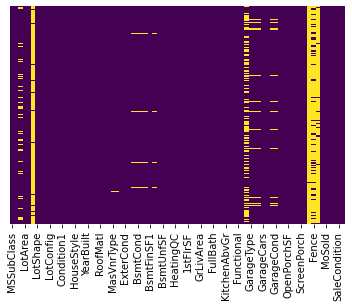

In [59]:
# check for nulls in train data
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<AxesSubplot:>

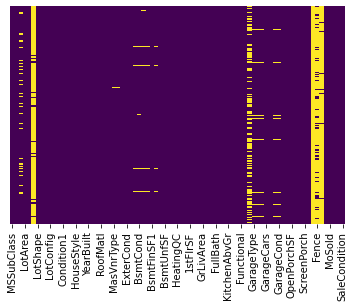

In [60]:
# check for nulls in test data
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [61]:
features_with_null = [
    feature for feature in df_train.columns if df_train[feature].isnull().sum() >= 1
]
for feature in features_with_null:
    percent_null = np.around(df_train[feature].isnull().mean(), 4)
    print(f"{feature}: {percent_null*100}% missing")

LotFrontage: 17.740000000000002% missing
Alley: 93.77% missing
MasVnrType: 0.5499999999999999% missing
MasVnrArea: 0.5499999999999999% missing
BsmtQual: 2.53% missing
BsmtCond: 2.53% missing
BsmtExposure: 2.6% missing
BsmtFinType1: 2.53% missing
BsmtFinType2: 2.6% missing
Electrical: 0.06999999999999999% missing
FireplaceQu: 47.260000000000005% missing
GarageType: 5.55% missing
GarageYrBlt: 5.55% missing
GarageFinish: 5.55% missing
GarageQual: 5.55% missing
GarageCond: 5.55% missing
PoolQC: 99.52% missing
Fence: 80.75% missing
MiscFeature: 96.3% missing


In [62]:
features_with_null = [
    feature for feature in df_test.columns if df_test[feature].isnull().sum() >= 1
]
for feature in features_with_null:
    percent_null = np.around(df_test[feature].isnull().mean(), 4)
    print(f"{feature}: {percent_null*100}% missing")

MSZoning: 0.27% missing
LotFrontage: 15.559999999999999% missing
Alley: 92.67% missing
Utilities: 0.13999999999999999% missing
Exterior1st: 0.06999999999999999% missing
Exterior2nd: 0.06999999999999999% missing
MasVnrType: 1.0999999999999999% missing
MasVnrArea: 1.03% missing
BsmtQual: 3.02% missing
BsmtCond: 3.08% missing
BsmtExposure: 3.02% missing
BsmtFinType1: 2.88% missing
BsmtFinSF1: 0.06999999999999999% missing
BsmtFinType2: 2.88% missing
BsmtFinSF2: 0.06999999999999999% missing
BsmtUnfSF: 0.06999999999999999% missing
TotalBsmtSF: 0.06999999999999999% missing
BsmtFullBath: 0.13999999999999999% missing
BsmtHalfBath: 0.13999999999999999% missing
KitchenQual: 0.06999999999999999% missing
Functional: 0.13999999999999999% missing
FireplaceQu: 50.029999999999994% missing
GarageType: 5.21% missing
GarageYrBlt: 5.35% missing
GarageFinish: 5.35% missing
GarageCars: 0.06999999999999999% missing
GarageArea: 0.06999999999999999% missing
GarageQual: 5.35% missing
GarageCond: 5.35% missing
Po

In [63]:
from sklearn import impute
replace_with_none = ["MiscFeature", "Fence", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "FireplaceQu", "BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond","BsmtQual", "MasVnrType", "Alley", "PoolQC"]

df_train.loc[:, replace_with_none] = df_train[replace_with_none].fillna("None")

df_train.loc[:, "MasVnrArea"] = df_train["MasVnrArea"].fillna(0)
df_train.loc[:,  "GarageYrBlt"] = df_train[ "GarageYrBlt"].fillna(0)

num_imp = impute.SimpleImputer(strategy="median")
num_imp.fit(df_train[numerical_features])
cat_imp = impute.SimpleImputer(strategy="most_frequent")
cat_imp.fit(df_train[categorical_features])

df_train[numerical_features] = num_imp.transform(df_train[numerical_features])
df_train[categorical_features] = cat_imp.transform(df_train[categorical_features])

In [64]:
replace_with_none = ["MiscFeature", "Fence", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "FireplaceQu", "BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond","BsmtQual", "MasVnrType", "Alley", "PoolQC"]

df_test.loc[:, replace_with_none] = df_test[replace_with_none].fillna("None")

df_test.loc[:, "MasVnrArea"] = df_test["MasVnrArea"].fillna(0)
df_test.loc[:,  "GarageYrBlt"] = df_test[ "GarageYrBlt"].fillna(0)

df_test[numerical_features] = num_imp.transform(df_test[numerical_features])
df_test[categorical_features] = cat_imp.transform(df_test[categorical_features])

In [65]:
features_with_null = [
    feature for feature in df_train.columns if df_train[feature].isnull().sum() >= 1
]
for feature in features_with_null:
    percent_null = np.around(df_train[feature].isnull().mean(), 4)
    print(f"{feature}: {percent_null*100}% missing")

In [66]:
features_with_null = [
    feature for feature in df_test.columns if df_test[feature].isnull().sum() >= 1
]
for feature in features_with_null:
    percent_null = np.around(df_test[feature].isnull().mean(), 4)
    print(f"{feature}: {percent_null*100}% missing")

In [69]:
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import  metrics

from sklearn.compose import ColumnTransformer

numerical_features = [
    feature for feature in df_train.columns if df_train[feature].dtype!="O" and feature!="SalePrice"
]
categorical_features = [
    feature for feature in df_train.columns if df_train[feature].dtype=="O"
]

preprocessor = ColumnTransformer([
    ("num", "passthrough", numerical_features),
    ("cat", preprocessing.OneHotEncoder(), categorical_features),
])

y_train = df_train.SalePrice.values

preprocessor.fit(df_train[numerical_features+categorical_features])
x_train = preprocessor.transform(df_train[numerical_features+categorical_features])
x_test = preprocessor.transform(df_test[numerical_features+categorical_features])

model = ensemble.GradientBoostingRegressor(alpha=0.1, max_depth=5, subsample=0.7)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
